In [1]:
from __future__ import absolute_import, division, print_function

import os

import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import optimizers,losses,datasets
from tensorflow.keras.layers import Dropout,Dense
tf.__version__

'2.1.0'

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

shape_size = 28 * 28

train_images = train_images.reshape(-1, shape_size) / 255.0
test_images = test_images.reshape(-1, shape_size) / 255.0

5


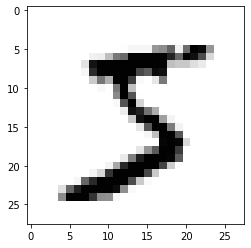

In [3]:
#show an example data
plt.imshow(train_images[0].reshape(28, 28),cmap='Greys')
print(train_labels[0])

In [4]:
model = keras.models.Sequential([
    Dense(shape_size, activation=tf.nn.relu, input_shape=(shape_size,),name="Inputs"),
    Dense(shape_size/2, activation=tf.nn.relu, input_shape=(shape_size,),name="Hidden1"),
    Dropout(0.2,name="Dropou1"),
    Dense(shape_size/4, activation=tf.nn.relu, input_shape=(shape_size/2,),name="Hidden2"),
    Dropout(0.2,name="Dropout2"),
    Dense(10, activation=tf.nn.softmax,name="Output")
  ])

model.compile(optimizer=optimizers.Adam(),loss=losses.sparse_categorical_crossentropy,metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Inputs (Dense)               (None, 784)               615440    
_________________________________________________________________
Hidden1 (Dense)              (None, 392)               307720    
_________________________________________________________________
Dropou1 (Dropout)            (None, 392)               0         
_________________________________________________________________
Hidden2 (Dense)              (None, 196)               77028     
_________________________________________________________________
Dropout2 (Dropout)           (None, 196)               0         
_________________________________________________________________
Output (Dense)               (None, 10)                1970      
Total params: 1,002,158
Trainable params: 1,002,158
Non-trainable params: 0
______________________________________________

In [5]:
model.fit(train_images, train_labels,  epochs = 20,validation_data = (test_images,test_labels),verbose=1)
loss, acc = model.evaluate(test_images, test_labels)
print("Trained model, accuracy: {:5.2f}%".format(100*acc))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 105us/sample - loss: 0.2171 - accuracy: 0.9354 - val_loss: 0.1092 - val_accuracy: 0.9664
Epoch 2/20
60000/60000 [==============================] - 6s 93us/sample - loss: 0.0974 - accuracy: 0.9715 - val_loss: 0.0989 - val_accuracy: 0.9671
Epoch 3/20
60000/60000 [==============================] - 5s 90us/sample - loss: 0.0700 - accuracy: 0.9790 - val_loss: 0.0869 - val_accuracy: 0.9760
Epoch 4/20
60000/60000 [==============================] - 5s 90us/sample - loss: 0.0576 - accuracy: 0.9832 - val_loss: 0.0797 - val_accuracy: 0.9772
Epoch 5/20
60000/60000 [==============================] - 5s 89us/sample - loss: 0.0470 - accuracy: 0.9861 - val_loss: 0.0985 - val_accuracy: 0.9767
Epoch 6/20
60000/60000 [==============================] - 5s 91us/sample - loss: 0.0409 - accuracy: 0.9877 - val_loss: 0.0922 - val_accuracy: 0.9792
Epoch 7/20
60000/60000 [==============================]

In [6]:
model.save('modelim.h5')